In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

In [171]:
weather = pd.read_csv("C:\\Users\\adity\\Documents\\TableauWork\\TwinCities_WeatherData.csv")

In [172]:
## Replace T in the Snow to 0.1
weather.snow[weather.snow == 'T'] = 0.1

In [173]:
# Convert the values in the column to date
dates = pd.to_datetime(weather['date'])

In [174]:
# Create a new dataframe and get the month of Feb only
new_weather = pd.DataFrame({'Month': dates.dt.month, 'Year': dates.dt.year, 'Max': weather['max'],
                           'Min': weather['min'], 'Snow': weather['snow']})
febs = new_weather[new_weather.Month == 2]
febs.Snow = febs.Snow.astype(float)


In [175]:
febs = febs[febs.Year >= 2000]

In [176]:
max_snow = np.max(febs.Snow)

Text(18.6,9.4,'2019')

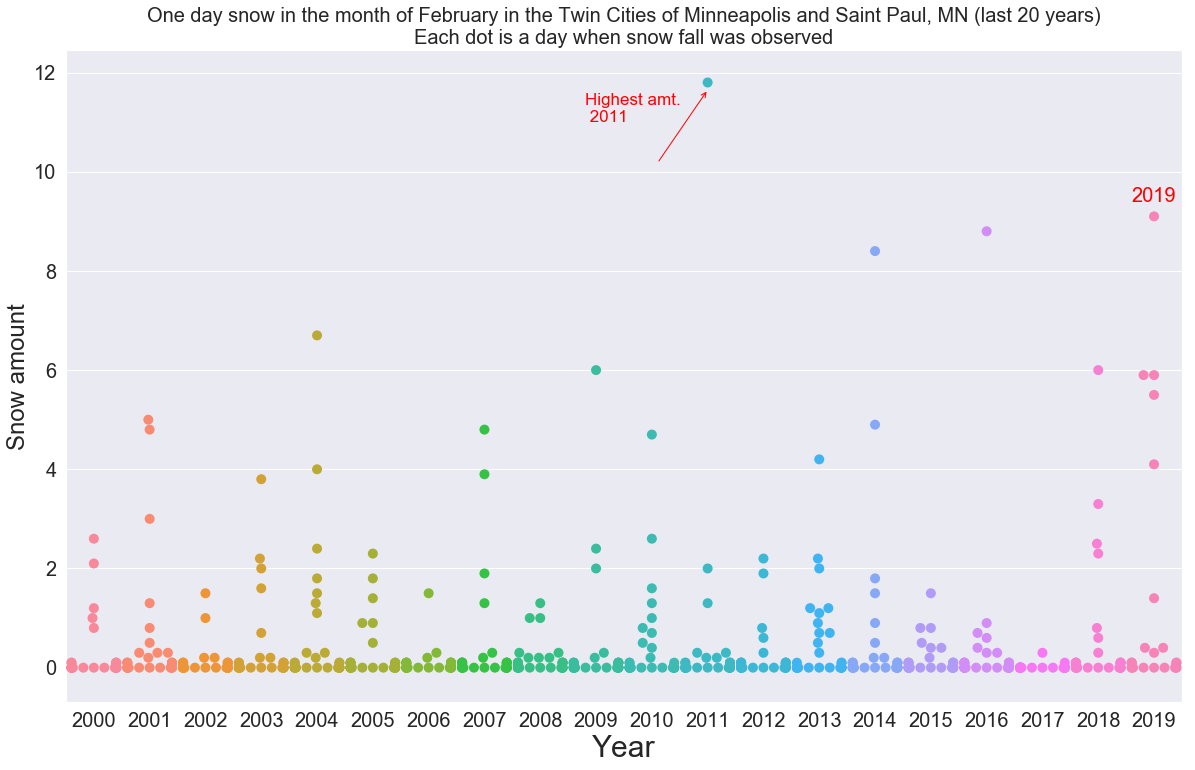

In [179]:
## Create a swarm plot
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
sns.set(style='darkgrid')
feb_plot = sns.swarmplot(x='Year', y='Snow', size=10, data=febs)
feb_plot.set_title('One day snow in the month of February in the Twin Cities of Minneapolis and Saint Paul, MN (last 20 years)\nEach dot is a day when snow fall was observed', fontsize=20)
feb_plot.set_xlabel('Year',fontsize=30)
feb_plot.set_ylabel('Snow amount',fontsize=24)
feb_plot.tick_params(labelsize=20)
feb_plot.annotate('Highest amt. \n 2011', xy=(8.8,max_snow-0.80), fontsize=17, color='red') 
feb_plot.annotate(' ', xy=(11,max_snow-0.15), xytext=(10,10), arrowprops=dict(arrowstyle="->", color='red'));
feb_plot.annotate('2019', xy=(18.6,9.4), fontsize=20, color='red') 

In [180]:
# Find number of days when we get snow
febs_year = febs[febs.Snow != 0].groupby('Year').size().reset_index(name='counts')

In [181]:
avg_days = np.average(febs_year.counts)

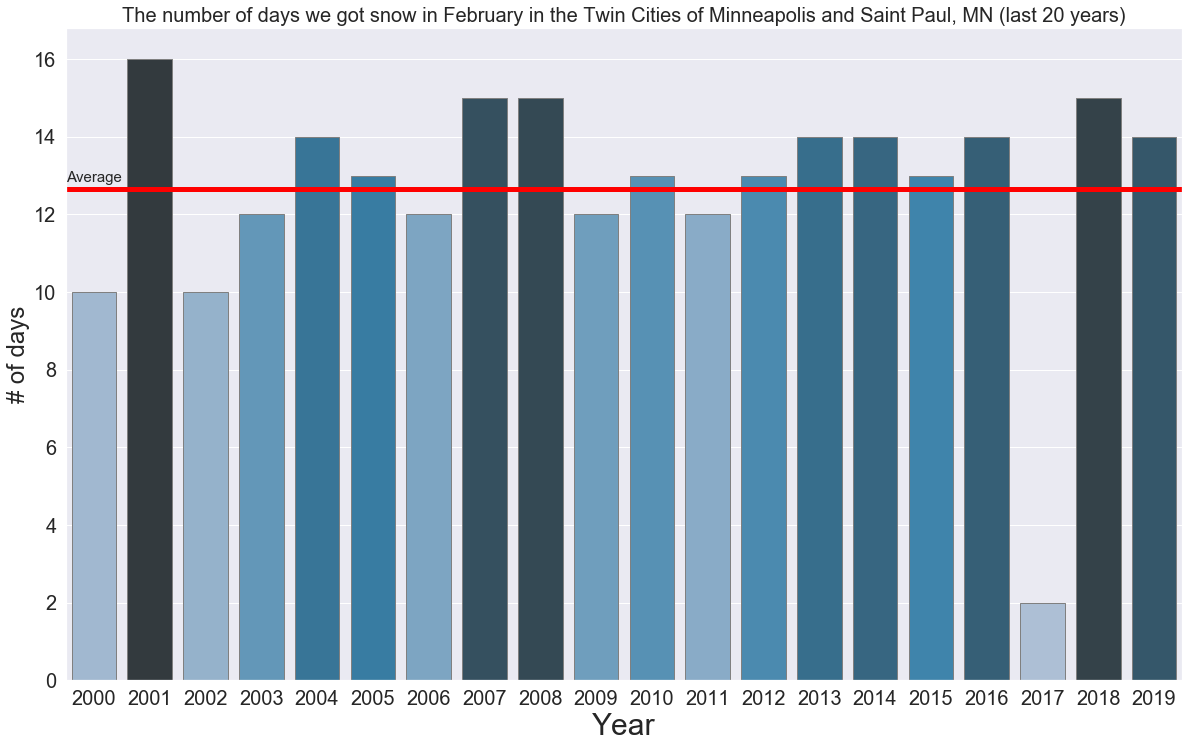

In [182]:
# Let's plot the number of days we get snow in February
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
sns.set(style='whitegrid')

pal = sns.color_palette("PuBu_d", len(febs_year.counts))
rank = febs_year.counts.argsort().argsort()  # http://stackoverflow.com/a/6266510/1628638
feb_plot=sns.barplot(x=febs_year.Year, y=febs_year.counts, palette=np.array(pal[::-1])[rank], edgecolor="grey")

feb_plot.set_title('The number of days we got snow in February in the Twin Cities of Minneapolis and Saint Paul, MN (last 20 years)', fontsize=20)
feb_plot.set_xlabel('Year',fontsize=30)
feb_plot.set_ylabel('# of days',fontsize=24)
feb_plot.tick_params(labelsize=20)
feb_plot.axhline(y=avg_days, linewidth=5, color='red')
feb_plot.annotate('Average', xy=(-.5,avg_days+0.2), fontsize=15);

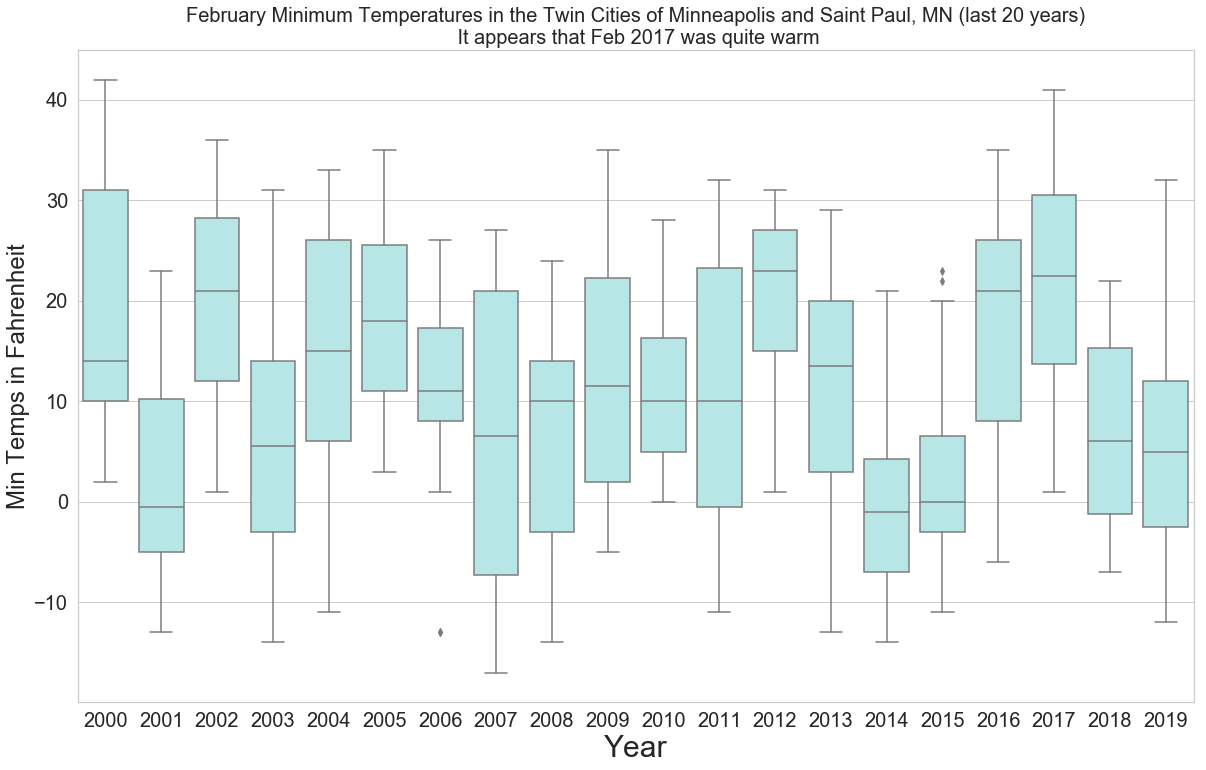

In [183]:
## Let's see the box plot of the Min Temperatures for Feb to find out
## a possible reason the snow was very low in Feb 2017

feb_min =  febs.copy()
feb_min.Min = feb_min.Min.astype('float')
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
sns.set(style='whitegrid')

feb_box = sns.boxplot(x='Year', y='Min', data=feb_min, color='paleturquoise')
feb_box.set_title('February Minimum Temperatures in the Twin Cities of Minneapolis and Saint Paul, MN (last 20 years)\n It appears that Feb 2017 was quite warm', 
                  fontsize=20)
feb_box.set_xlabel('Year',fontsize=30)
feb_box.set_ylabel('Min Temps in Fahrenheit',fontsize=24)
feb_box.tick_params(labelsize=20)

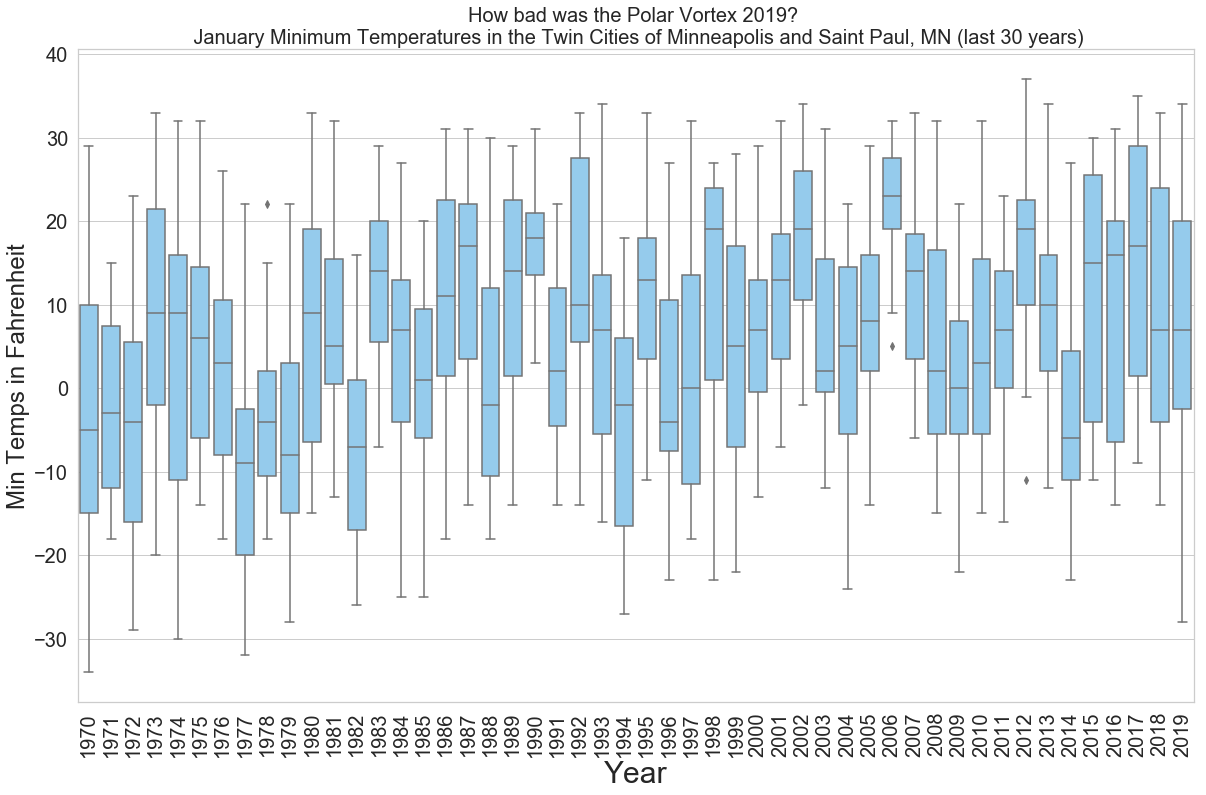

In [169]:
## How bad was the Polar Vortex 2019?
jans = new_weather[new_weather.Month == 1]
jans.Min = jans.Min.astype(float)
jans = jans[jans.Year >=1970]
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
sns.set(style='whitegrid')
jan_box = sns.boxplot(x='Year', y='Min', data=jans, color='lightskyblue')
jan_box.set_title('How bad was the Polar Vortex 2019? \n January Minimum Temperatures in the Twin Cities of Minneapolis and Saint Paul, MN (last 30 years)', fontsize=20)
jan_box.set_xlabel('Year',fontsize=30)
jan_box.set_ylabel('Min Temps in Fahrenheit',fontsize=24)
jan_box.tick_params(labelsize=20)

for item in jan_box.get_xticklabels():
    item.set_rotation(90)

In [162]:
## Calculate the temp span for min temperatures 
def calc_swing(list):
    return max(list.Min)-min(list.Min)

In [167]:
jan_swing = jans.groupby('Year').apply(calc_swing).reset_index(name='Swing')

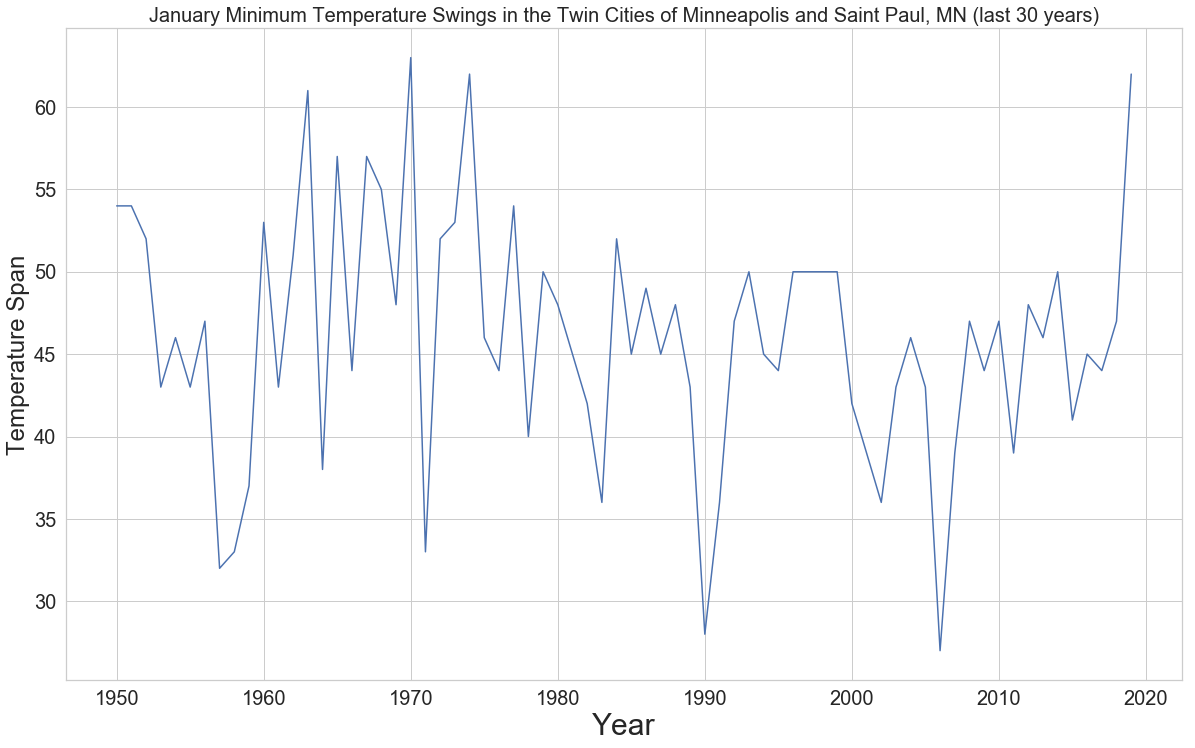

In [170]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
sns.set(style='whitegrid')
jan_swing_plot = sns.lineplot(x='Year', y='Swing', markers=True, data=jan_swing)
jan_swing_plot.set_title('January Minimum Temperature Swings in the Twin Cities of Minneapolis and Saint Paul, MN (last 30 years)', fontsize=20)
jan_swing_plot.set_xlabel('Year',fontsize=30)
jan_swing_plot.set_ylabel('Temperature Span',fontsize=24)
jan_swing_plot.tick_params(labelsize=20)

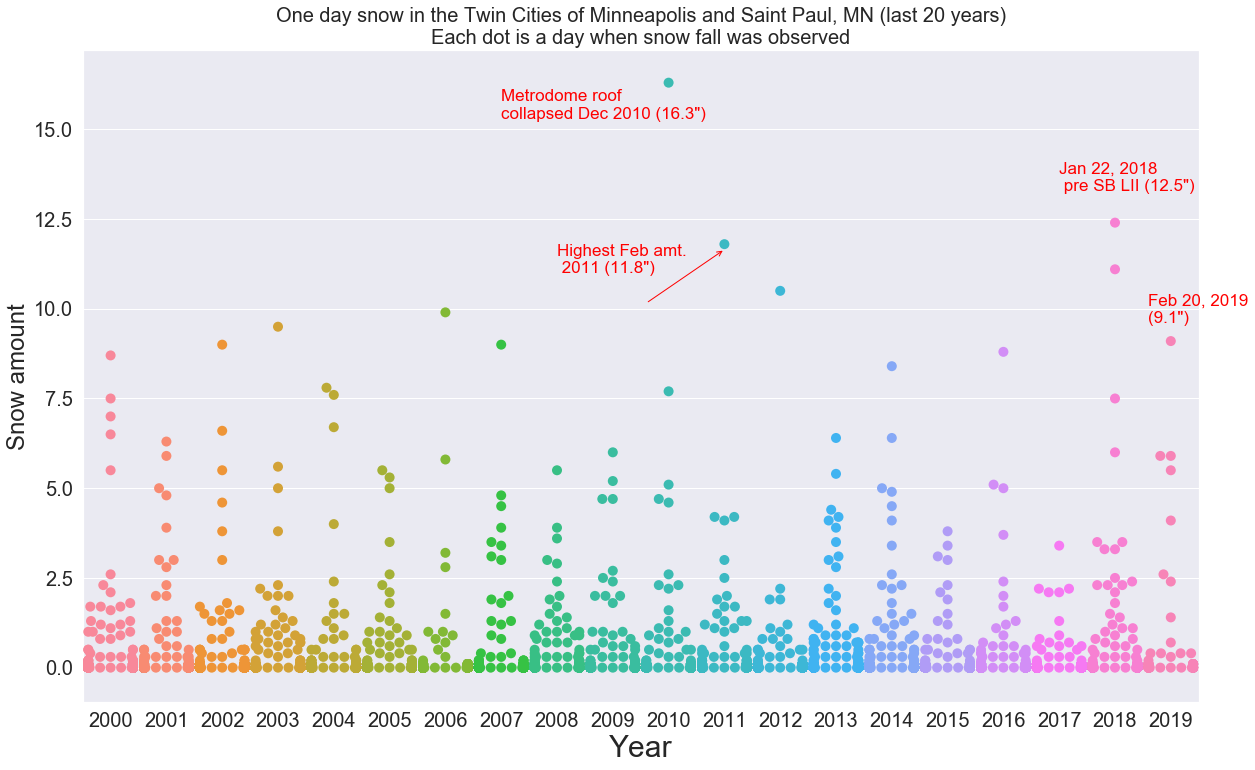

In [193]:
## One day snow in the last 20 years
## Create a swarm plot
last50 = new_weather[new_weather.Year >= 2000]
last50.Snow = last50.Snow.astype(float)
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
sns.set(style='darkgrid')
feb_plot = sns.swarmplot(x='Year', y='Snow', size=10, data=last50)
feb_plot.set_title('One day snow in the Twin Cities of Minneapolis and Saint Paul, MN (last 20 years)\nEach dot is a day when snow fall was observed', fontsize=20)
feb_plot.set_xlabel('Year',fontsize=30)
feb_plot.set_ylabel('Snow amount',fontsize=24)
feb_plot.tick_params(labelsize=20)
feb_plot.annotate('Highest Feb amt. \n 2011 (11.8")', xy=(8,max_snow-0.80), fontsize=17, color='red') 
feb_plot.annotate(' ', xy=(11,max_snow-0.15), xytext=(9.5,10), arrowprops=dict(arrowstyle="->", color='red'))
feb_plot.annotate('Feb 20, 2019\n(9.1")', xy=(18.6,9.6), fontsize=17, color='red') 
feb_plot.annotate('Metrodome roof \ncollapsed Dec 2010 (16.3")', xy=(7,max_snow+3.5), fontsize=17, color='red') 
feb_plot.annotate('Jan 22, 2018 \n pre SB LII (12.5")', xy=(17,max_snow+1.5), fontsize=17, color='red');